# Prediction of Annual Water Usage in Baltimore.

The dataset that used in this program was annual water useage in Baltimore, the purpose of this program is to make a prediction for water usage.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
data = pd.read_csv("water.csv", error_bad_lines=False)

data.Year = pd.to_datetime(data.Year, format='%Y')
data = data.set_index('Year')

data = data.rename(columns={'Baltmore city annual water use, liters per capita per day, 1885-1968': 'water'})

data = data.astype('float64')
data.head()

b'Skipping line 82: expected 2 fields, saw 3\n'


,water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


# Split data into train and validation

In [3]:
X_train, X_val = train_test_split(data, test_size=0.33, shuffle=False)

# Summary the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 1885-01-01 to 1963-01-01
Data columns (total 1 columns):
water    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [5]:
data.describe()

,water
count,79.000000
mean,512.025316
std,75.685072
min,344.000000
25%,462.000000
50%,503.000000
75%,581.000000
max,662.000000


# Plot the data to get the insight

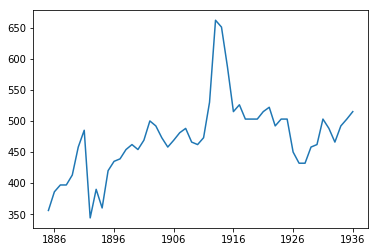

In [6]:
plt.plot(X_train)

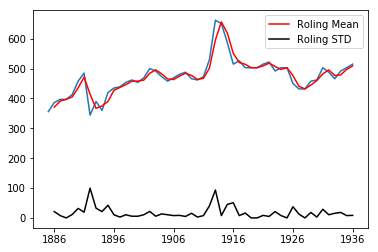

In [7]:
rolmean = X_train.rolling(window=2).mean()
rolstd = X_train.rolling(window=2).std()
plt.plot(X_train)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [8]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')
dftest = adfuller(X_train['water'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-2.7421004965362523, 0.06703204860767971, 1, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 384.2395531843111)


Test Stat             -2.742100
p-value                0.067032
lag_used               1.000000
number of obs used    50.000000
dtype: float64

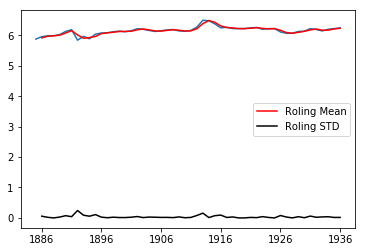

In [9]:
X_train2 = np.log(X_train)
rolmean = X_train2.rolling(window=2).mean()
rolstd = X_train2.rolling(window=2).std()
plt.plot(X_train2)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

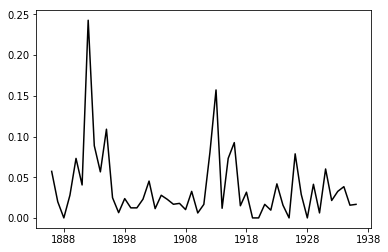

In [10]:
plt.plot(rolstd,color='black',label='Roling STD')

In [11]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest = adfuller(X_train2['water'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-2.617062322142881, 0.0895218585051824, 1, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, -118.98976898960629)


Test Stat             -2.617062
p-value                0.089522
lag_used               1.000000
number of obs used    50.000000
dtype: float64

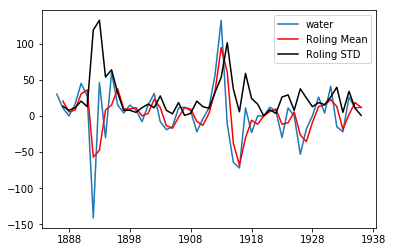

In [12]:
from statsmodels.tsa.stattools import adfuller
diff = X_train['water'] - X_train['water'].shift()
diff = diff.dropna()

rolmean = diff.rolling(window=2).mean()
rolstd = diff.rolling(window=2).std()
plt.plot(diff)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest = adfuller(diff,autolag='AIC')
print(dftest)
dfoutput = pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-5.27370010615997, 6.20599989595577e-06, 1, 49, {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}, 381.5868098955805)


Test Stat             -5.273700
p-value                0.000006
lag_used               1.000000
number of obs used    49.000000
dtype: float64

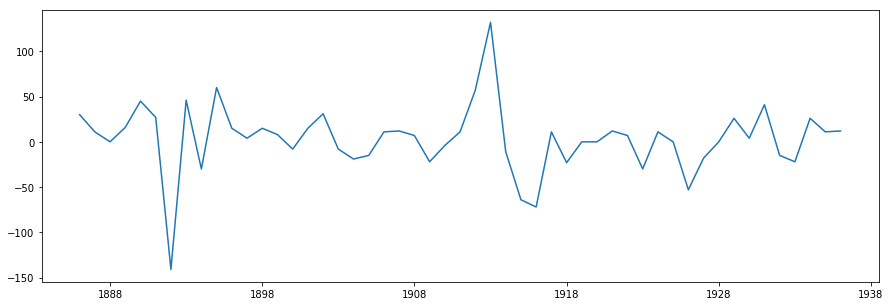

In [14]:
plt.figure(figsize=(15,5))
plt.plot(diff)

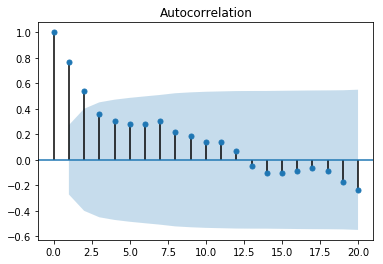

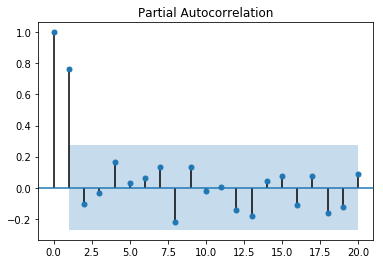

In [15]:
import statsmodels.graphics.tsaplots as sts
sts.plot_acf(X_train, lags=20)
sts.plot_pacf(X_train, lags=20)
plt.show()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

Plotting ARIMA model


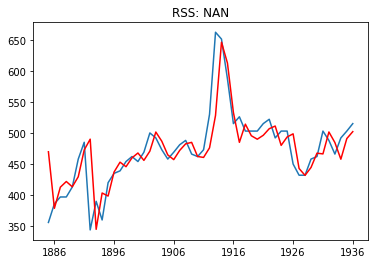

In [17]:
model = ARIMA(X_train, order=(1,0,2))
results = model.fit()
predictions = results.fittedvalues
plt.plot(X_train)
plt.plot(predictions, color='red')
plt.title('RSS: %.4F' % sum((results.fittedvalues-data['water'])**2))
print('Plotting ARIMA model')

In [18]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 540.0820  
Dependent Variable: water            Log-Likelihood:      -260.16   
Date:               2019-10-10 16:33 Scale:               1.0000    
No. Observations:   52               Method:              css-mle   
Df Model:           4                Sample:              01-01-1885
Df Residuals:       48                                    01-01-1936
Converged:          1.0000           S.D. of innovations: 35.619    
AIC:                530.3258         HQIC:                534.066   
---------------------------------------------------------------------
               Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const         469.7435   19.1654  24.5100  0.0000  432.1801  507.3069
ar.L1.water     0.6052    0.2371   2.5527  0.0139    0.1405    1.0699
ma.L1.water     0.3533    0.2863   1.2340  0.2232   -0.2078    0.9144
ma.L2.water     0.2330    0.2405   0.9690  0.3374   -0.2383    0.7044
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.6524             0.0000           1.6524             0.0000
MA.1           -0.7579            -1.9278           2.0715            -0.3096
MA.2           -0.7579             1.9278           2.0715             0.3096
====================================================================

"""

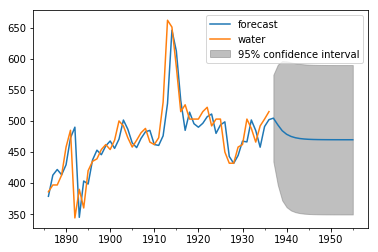

In [19]:
results.plot_predict(1,70)
x = results.forecast(steps=2)

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(X_train, pd.DataFrame(predictions).round(0))
print('Nilai MAPE dari ARIMA : %.2f%%' % (MAPE))

Nilai MAPE dari ARIMA : 5.25%


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(X_train, predictions)
RMSE = sqrt(MSE)
print('Nilai RMSE dari model ARIMA : %.2f' % (RMSE))

Nilai RMSE dari model ARIMA : 37.86
